In [ ]:
# ================================================================
# NOTEBOOK 3 — ANIMACIÓN 3D: Mapa de Colombia + Embeddings (2015–2022)
# Autor: John Jairo Prado Piñeres
# Año: 2025
# Descripción:
#    Este notebook genera un GIF 3D combinando el mapa real de Colombia y
#    los embeddings PCA (proyección 3D) de los años 2015 a 2022.
# ================================================================

In [ ]:
# 1. IMPORTACIONES

In [3]:

import os
import torch
import pandas as pd
import geopandas as gpd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

print("Librerías cargadas con éxito.")
print("imageio OK")


Librerías cargadas con éxito.
imageio OK


In [ ]:
# Fondo oscuro

In [23]:
plt.style.use("dark_background")

In [ ]:
# Colores neón definidos

In [24]:
# Colores estilo NEÓN
color_mapa = "#00e5ff"      # azul neón
color_puntos = "#ffea00"    # amarillo brillante
color_borde = "#ffffff"     # blanco suave
color_texto = "#00e5ff"     # azul cian brillante


In [ ]:
# RUTAS DEL PROYECTO

In [4]:
# RUTAS DEL PROYECTO

ruta_emb = r"C:/Users/john/Desktop/Saber_11_2025/resultados/embeddings/embeddings_2015_2022.csv"
ruta_geojson = r"C:/Users/john/Desktop/Saber_11_2025/mapas/Colombia.geojson"
ruta_salida = r"C:/Users/john/Desktop/Saber_11_2025/animaciones"

os.makedirs(ruta_salida, exist_ok=True)

print("Rutas configuradas:")
print(" - Embeddings:", ruta_emb)
print(" - GeoJSON:", ruta_geojson)
print(" - Carpeta salida:", ruta_salida)


Rutas configuradas:
 - Embeddings: C:/Users/john/Desktop/Saber_11_2025/resultados/embeddings/embeddings_2015_2022.csv
 - GeoJSON: C:/Users/john/Desktop/Saber_11_2025/mapas/Colombia.geojson
 - Carpeta salida: C:/Users/john/Desktop/Saber_11_2025/animaciones


In [ ]:
# CARGAR EMBEDDINGS

In [31]:

df = pd.read_csv(
    r"C:/Users/john/Desktop/Saber_11_2025/resultados/embeddings/embeddings_2015_2022.csv",
    index_col=0
)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
anio,,,,,,,,,,,,,,,,
2015,-0.013285,-0.090360,0.014918,-0.193424,-0.085967,0.108265,0.361620,0.111973,-0.094300,-0.068606,-0.195047,-0.181644,-0.096827,0.127936,-0.013351,-0.161770
2016,-0.195073,0.281308,-0.024735,0.117337,0.042593,-0.216274,-0.048270,-0.019949,-0.045212,-0.292472,-0.254604,0.290325,-0.053898,-0.112172,0.069332,-0.137538
2017,-0.084518,-0.202669,-0.163925,0.034460,0.003330,0.247710,0.005441,-0.120514,-0.071859,0.015435,0.019399,-0.037720,-0.173882,0.048210,0.088221,0.077796
2018,0.111962,-0.017034,0.506638,-0.220439,0.359079,-0.125214,0.166344,-0.070628,0.164679,0.043943,0.401484,-0.114283,0.120481,0.054075,0.678628,-0.328001
2019,0.095019,-0.421412,-0.077540,0.175998,-0.088899,-0.119443,0.002129,-0.127941,-0.104979,0.110968,-0.003392,0.242536,-0.329259,-0.234814,0.208090,-0.141206


In [ ]:
# PCA 3D sobre embeddings

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
coords = pca.fit_transform(df.values)

df_pca = pd.DataFrame(coords, index=df.index, columns=["PC1","PC2","PC3"])
df_pca


,PC1,PC2,PC3
anio,,,
2015,-0.201699,-0.290129,0.402744
2016,-0.295536,0.385936,-0.051123
2017,-0.248024,-0.173185,-0.077577
2018,0.935341,-0.178060,0.003679
2019,-0.273907,-0.325971,-0.534285
2020,0.180943,0.786137,-0.094924
2021,0.139927,-0.267737,-0.006388
2022,-0.237045,0.063008,0.357875


In [ ]:
# Cargar el mapa de Colombia (GeoJSON)

In [33]:
import geopandas as gpd

ruta = r"C:/Users/john/Desktop/Saber_11_2025/mapas/colombia.geojson"
gdf = gpd.read_file(ruta)

poligonos = []

for geom in gdf.geometry:
    if geom.geom_type == "Polygon":
        poligonos.append(np.array(geom.exterior.coords))
    elif geom.geom_type == "MultiPolygon":
        for p in geom:
            poligonos.append(np.array(p.exterior.coords))


C:\Users\john\anaconda3\envs\gnn_env\lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files. Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


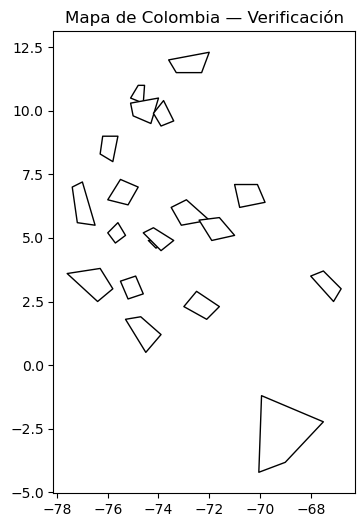

Mapa cargado. Polígonos: 19


In [9]:
# CARGAR MAPA

mapa = gpd.read_file(ruta_geojson)

mapa.plot(edgecolor="black", facecolor="white", figsize=(6,6))
plt.title("Mapa de Colombia — Verificación")
plt.show()

print("Mapa cargado. Polígonos:", len(mapa))


In [ ]:
# Normalizar mapa (MUY IMPORTANTE)

In [35]:
# Convertimos todos los polígonos a rango [-1,1]
poligonos_norm = []

for poly in poligonos:
    p = poly.copy()
    p[:,0] = (p[:,0] - p[:,0].mean()) / (p[:,0].max() - p[:,0].min())
    p[:,1] = (p[:,1] - p[:,1].mean()) / (p[:,1].max() - p[:,1].min())
    poligonos_norm.append(p)


In [ ]:
# Colores estilo neón

In [36]:
color_mapa = "#00FFFF"      # cian neón
color_puntos = "#FF00FF"    # magenta brillante
color_borde = "white"
color_texto = "#00FFAA"


In [37]:
# Función de graficación 3D (mapa + embeddings)

In [45]:
def plot_3d(ax):
    # ===========================
    #  MAPA NEÓN
    # ===========================
    for poly in poligonos_norm:
        x = poly[:,0]
        y = poly[:,1]

        # Halo neón
        ax.plot(
            x, y, zs=-2.5,
            color=color_mapa,
            linewidth=6,
            alpha=0.15
        )
        # Línea brillante
        ax.plot(
            x, y, zs=-2.5,
            color=color_mapa,
            linewidth=2,
            alpha=0.9
        )

    # ===========================
    #  POINT CLOUD (EMBEDDINGS)
    # ===========================
    ax.scatter(
        df_pca["PC1"],
        df_pca["PC2"],
        df_pca["PC3"],
        c=color_puntos,
        s=180,
        edgecolor=color_borde,
        linewidths=1.5,
        alpha=0.95
    )

    # Etiquetas
    for i, year in enumerate(df_pca.index):
        ax.text(
            df_pca.iloc[i]["PC1"],
            df_pca.iloc[i]["PC2"],
            df_pca.iloc[i]["PC3"],
            str(year),
            fontsize=12,
            color=color_texto,
            weight="bold"
        )

    # Etiquetas de ejes
    ax.set_xlabel("PC1", color="white")
    ax.set_ylabel("PC2", color="white")
    ax.set_zlabel("PC3", color="white")
    ax.set_title("Embeddings 3D + Mapa de Colombia (Neón)", fontsize=14, color="cyan")

    # ===========================
    #  Fondo completamente negro
    # ===========================
    ax.set_facecolor("black")

    # Quitar mallas
    ax.grid(False)


In [39]:
# Probar si funciona

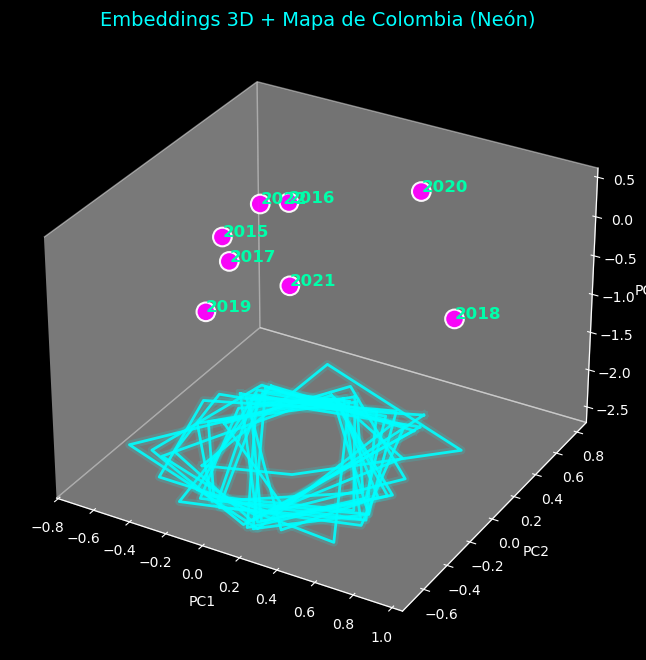

Imagen exportada en: C:/Users/john/Desktop/Saber_11_2025/animaciones\embeddings_mapa_3d.png


In [48]:
# Crear figura
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# Renderizar
plot_3d(ax)

# Exportar imagen
output_path = os.path.join(ruta_salida, "embeddings_mapa_3d.png")
plt.savefig(output_path, dpi=300, facecolor="black")

# Mostrar en pantalla
plt.show()

print("Imagen exportada en:", output_path)
